## Word2Vec
- 단어간 유사도를 반영할 수 있도록 단어의 의미를 벡터화 할 수 있는 방법 필요
- 단어의 의미를 다차원 공간에 벡터화 하는 방법 ==> 분산 표현
- 임베딩 벡터이자 밀집 벡터 표현

## CBOW
- 주변 단어들을 가지고 중간에 있는 단어들을 예측하는 방법

## Skip-gram
- 중심 단어에서 주변 단어들을 예측하는 방법

## Activity

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\park1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

In [3]:
stopword = stopwords.words('english')

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

In [4]:
target = open('ted_en-20160408.xml','r',encoding='UTF8')
target_text = etree.parse(target)

In [5]:
parse_text = '\n'.join(target_text.xpath('//content/text()'))

In [6]:
content_text = re.sub(r'\([^)]*\) ', '',  parse_text) 

In [7]:
sent_text = sent_tokenize(content_text)

In [8]:
len(sent_text),sent_text[0]

(273562,
 "Here are two reasons companies fail: they only do more of the same, or they only do what's new.")

In [9]:
normalized_text = []

for sent in sent_text:
    tokens = re.sub('[^a-z0-9]',' ',sent.lower())
    normalized_text.append(tokens)

In [10]:
result = [word_tokenize(i) for i in normalized_text]

In [11]:
len(result)

273562

In [12]:
from gensim.models import Word2Vec
model = Word2Vec(sentences= result, vector_size=100, window=5, min_count=5, workers=4, sg=0)   

C:\Users\park1\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [13]:
model_result=  model.wv.most_similar('man')
model_result

[('woman', 0.8538923263549805),
 ('guy', 0.8078092932701111),
 ('boy', 0.7952073812484741),
 ('lady', 0.7777677774429321),
 ('girl', 0.7586528658866882),
 ('gentleman', 0.7505642771720886),
 ('kid', 0.7075421214103699),
 ('soldier', 0.6882291436195374),
 ('surgeon', 0.6698469519615173),
 ('friend', 0.6667285561561584)]

### Save W2V model

In [14]:
from gensim.models import KeyedVectors

In [ ]:
model.wv.save_word2vec_format('eng_w2v')

In [ ]:
load_model = KeyedVectors.load_word2vec_format('eng_w2v')

In [ ]:
load_model.most_similar('woman')

### Korea Word2Vec

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from konlpy.tag import Okt

In [16]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x16f23d736a0>)

In [15]:
train_data = pd.read_table('ratings.txt')

In [16]:
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [17]:
train_data.document.isna().sum()

8

In [18]:
train_data.dropna(axis=0, inplace=True)

In [19]:
train_data.shape

(199992, 3)

In [20]:
train_data['document'] = train_data.document.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]"," ")

<ipython-input-20-f0f83e22abd9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data.document.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]"," ")


In [21]:
stop_kor = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [32]:
okt = Okt()
tokenized_data = []

for sent in train_data.document[:50000]:
    temp = okt.morphs(sent, stem=True)
    temp = [i for i in temp if i not in stop_kor]
    tokenized_data.append(temp)
    

10.46682
68
0


C:\Users\park1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


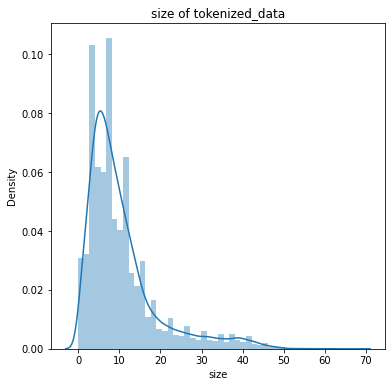

In [33]:
size=[]
for i in tokenized_data:
    size.append(len(i))
    
print(np.mean(size))
print(np.max(size))
print(np.min(size))

plt.figure(figsize=(6,6))
sns.distplot(size)
plt.title("size of tokenized_data")
plt.xlabel("size")
plt.show()


In [34]:
model = Word2Vec(sentences= tokenized_data, vector_size=30, window=5, min_count=5, workers=4, sg=0)   

In [40]:
model_result=  model.wv.most_similar('최민식')
model_result

[('황정민', 0.9740728139877319),
 ('쉬', 0.972300112247467),
 ('하정우', 0.9685091972351074),
 ('이병헌', 0.9647252559661865),
 ('디카프리오', 0.9631183743476868),
 ('케미', 0.960067629814148),
 ('서인국', 0.9580463171005249),
 ('엄정화', 0.9579238295555115),
 ('크로우', 0.9573973417282104),
 ('리암', 0.95634526014328)]